In [ ]:
from google.colab import drive

# Try using drive._mount instead of drive.mount
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

que = json.load(open('/content/drive/MyDrive/FinalProjectKS/OpenEnded_abstract_v002_train2015_questions.json', 'r'))
ans = json.load(open('/content/drive/MyDrive/FinalProjectKS/abstract_v002_train2015_annotations.json', 'r'))

print("Total no. of question are",len(que['questions']))
print("Total no. of answers are",len(ans['annotations']))


Total no. of question are 60000
Total no. of answers are 60000


In [ ]:
#!cd drive/My\ Drive
#from os import listdir
#image_dir = 'train2015'
#images= listdir(image_dir)

In [ ]:
import os
from os import listdir

# Change to the correct directory using os.chdir
os.chdir('/content/drive/MyDrive/FinalProjectKS/train2015')

# Now list the files in the current directory
image_dir = '.'  # Use '.' to represent the current directory
images = listdir(image_dir)

In [ ]:
!pip install tqdm # Install the tqdm package using pip

from tqdm import tqdm # Import the tqdm function from the tqdm module
import pandas as pd

In [ ]:

subtype='train2015'
data=[]
imdir='%s/COCO_%s_%012d.jpg'
for i in tqdm(range(len(ans['annotations']))):
    answ=ans['annotations'][i]['multiple_choice_answer']
    im_path=imdir%(subtype,subtype,ans['annotations'][i]['image_id'])
    ques=que['questions'][i]['question']
    data.append({'im_path':im_path,'ques':ques,'answ':answ})
total_data=pd.DataFrame(data)
total_data.head()

100%|██████████| 60000/60000 [00:00<00:00, 361717.21it/s]


,im_path,ques,answ
0,train2015/COCO_train2015_000000011779.jpg,Who looks happier?,man
1,train2015/COCO_train2015_000000011779.jpg,Where is the woman sitting?,blanket
2,train2015/COCO_train2015_000000011779.jpg,Where is the man sitting?,bench
3,train2015/COCO_train2015_000000005536.jpg,Is this man hungry?,yes
4,train2015/COCO_train2015_000000005536.jpg,What kind of drink is that?,soda


In [ ]:
total_data.shape


(60000, 3)

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


preprocessed_questions = []
for question in tqdm(total_data['ques'].values):
    que = decontracted(question)
    preprocessed_questions.append(que.lower().strip())
total_data['ques']=preprocessed_questions
total_data.head(2)

100%|██████████| 60000/60000 [00:01<00:00, 56525.36it/s]


,im_path,ques,answ
0,train2015/COCO_train2015_000000011779.jpg,who looks happier?,man
1,train2015/COCO_train2015_000000011779.jpg,where is the woman sitting?,blanket


In [ ]:
total_data=total_data.reset_index(drop=True)


a=pd.DataFrame(total_data['answ'].value_counts()[:2])
ind=list(a.index)

In [ ]:
top_data=pd.DataFrame()
for i in tqdm(ind):
    top_data1=total_data[total_data.answ == i]
    top_data=pd.concat([top_data,top_data1],ignore_index=True)

100%|██████████| 2/2 [00:00<00:00, 61.56it/s]


In [ ]:
print("Shape of data after considering top 2 answers is",top_data.shape)


Shape of data after considering top 2 answers is (24457, 3)


In [ ]:
top_data=top_data.sample(20000).reset_index(drop=True)


In [ ]:
top_data.to_csv('/content/drive/MyDrive/FinalProjectKS/top_data.csv',index=False)


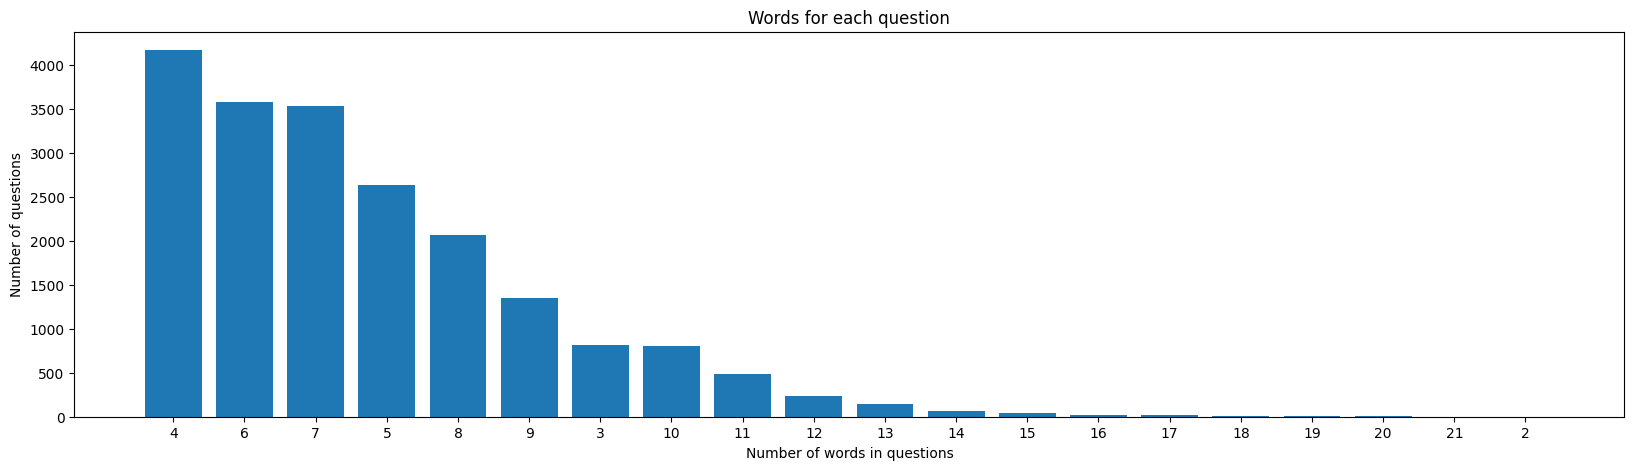

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

word_count = top_data['ques'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of questions')
plt.xlabel('Number of words in questions')
plt.title('Words for each question')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
# Observations
# Most of the question lenth is between 4-8
# Maximum lengtht of question is 21


In [ ]:
#que_word_count = top_data['ques'].str.split().apply(len)
#plt.boxplot(que_word_count)
#plt.xticks([1],'questions')
#plt.ylabel('Words in questions')
#plt.grid()
#plt.show()

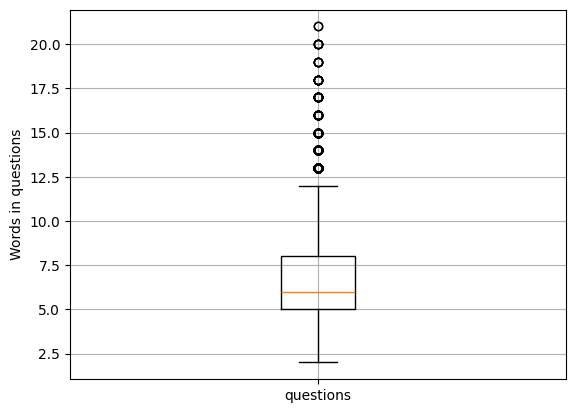

In [ ]:
que_word_count = top_data['ques'].str.split().apply(len)
plt.boxplot(que_word_count)
plt.xticks([1],['questions']) # Changed 'questions' to ['questions']
plt.ylabel('Words in questions')
plt.grid()
plt.show()

In [ ]:
# Observations
# 50% of data has around 5 to 8 words
# Most of the questions have less than 12 words


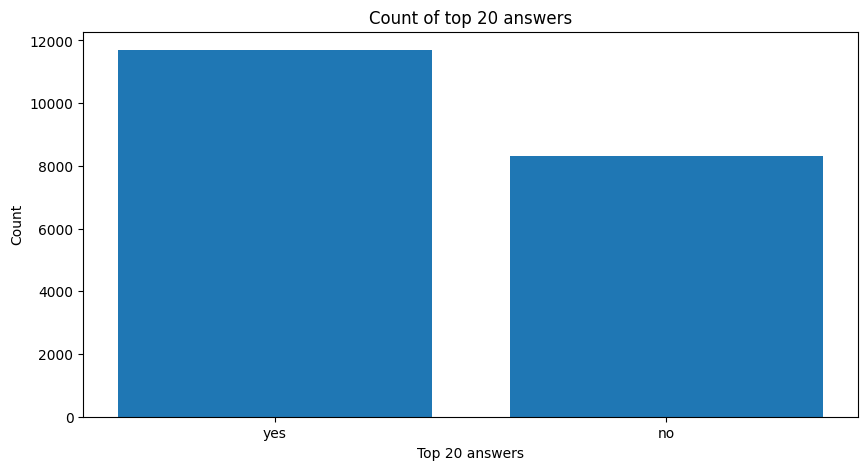

In [ ]:
word_count = top_data['answ'].value_counts()[0:20]
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(word_dict))
plt.figure(figsize=(10,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Count')
plt.xlabel('Top 20 answers')
plt.title('Count of top 20 answers')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
cnt1= total_data[total_data['answ']=='yes']['answ'].count()+total_data[total_data['answ']=='no']['answ'].count()
cnt2= len(total_data)-cnt1
print("Total no of binary(yes/no) answers  :",cnt1)
print("% of binary answers                 :",np.round(cnt1/len(total_data)*100,2))
print("Total no of multiple answers        :",cnt2)
print("% of multiple answers               :",np.round(cnt2/len(total_data)*100,2))

Total no of binary(yes/no) answers  : 24457
% of binary answers                 : 40.76
Total no of multiple answers        : 35543
% of multiple answers               : 59.24


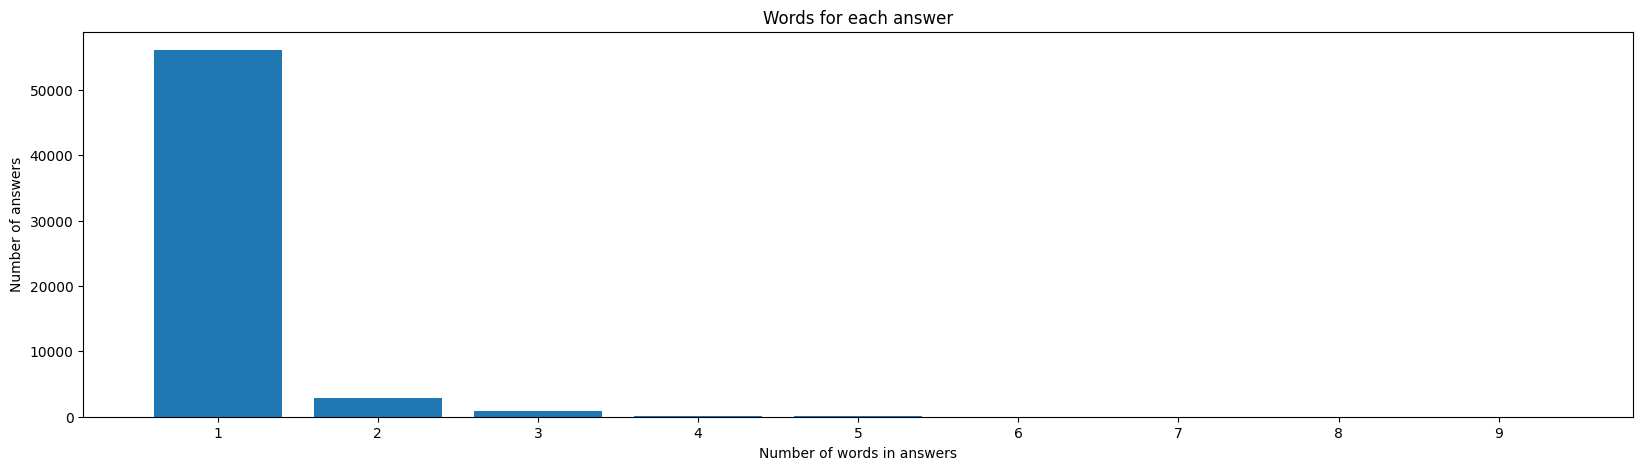

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
word_count = total_data['answ'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of answers')
plt.xlabel('Number of words in answers')
plt.title('Words for each answer')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
#  #Get the value counts for each class in 'answ' column
# value_counts = total_data['answ'].value_counts()

# # Filter classes with only one instance
# single_instance_classes = value_counts[value_counts == 1]

# # Get the number of such classes
# num_single_instance_classes = len(single_instance_classes)

# print(f"Number of classes with only one member: {num_single_instance_classes}")

# # Optionally, print the classes with only one instance
# print("Classes with only one instance:")
# print(single_instance_classes.index.tolist())

In [ ]:
y = top_data['answ']
#top_data.drop(['answ'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(top_data,y,test_size=0.3,stratify=y,random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split

# # Get the value counts for each class in 'answ' column
# value_counts = total_data['answ'].value_counts()

# # Filter classes with more than one instance
# multi_instance_classes = value_counts[value_counts > 1].index

# # Filter the DataFrame to include only rows with these classes
# filtered_data = total_data[total_data['answ'].isin(multi_instance_classes)]

# # Now perform the train-test split on the filtered data
# x_train, x_test, y_train, y_test = train_test_split(
#     filtered_data.drop('answ', axis=1), filtered_data['answ'], test_size=0.3, stratify=filtered_data['answ'], random_state=42)

In [ ]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [ ]:
x_train=pd.read_csv('x_train.csv')
x_test=pd.read_csv('x_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

In [ ]:
y_train.drop(['Unnamed: 0'],axis=1,inplace=True)
y_test.drop(['Unnamed: 0'],axis=1,inplace=True)


In [ ]:
!pip install keras_preprocessing # Install the missing library

from keras_preprocessing.image import ImageDataGenerator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
def textokenizer(text):
  max_length = 24
  tok = Tokenizer()
  tok.fit_on_texts(x_train['ques'])
  vocab_size = len(tok.word_index) + 1
  #print('Total unique words in the x_train',vocab_size)
  encoded_text = tok.texts_to_sequences(text)
  padded_text = pad_sequences(encoded_text, maxlen=max_length)  #padding zeros at the begining of each question so that each sequence will have same length
  #print(padded_text.shape)
  return padded_text, tok

In [ ]:
import numpy as np

# Path to the GloVe file (e.g., 'glove.6B.300d.txt' for 300-dimensional vectors)
glove_file = '/content/drive/MyDrive/FinalProjectKS/glove.6B.300d.txt'

# Load GloVe embeddings into a dictionary
glove_model = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_model[word] = vector

print(f"Loaded {len(glove_model)} words from GloVe.")


Loaded 400001 words from GloVe.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences

def textokenizer(text):
  max_length = 24
  tok = Tokenizer()
  tok.fit_on_texts(x_train['ques'])
  vocab_size = len(tok.word_index) + 1
  #print('Total unique words in the x_train',vocab_size)
  encoded_text = tok.texts_to_sequences(text)
  padded_text = pad_sequences(encoded_text, maxlen=max_length)  #padding zeros at the begining of each question so that each sequence will have same length
  #print(padded_text.shape)
  return padded_text, tok

In [ ]:
model = glove_model  # Use the previously loaded glove_model
glove_words = set(model.keys())

# for train
_, tok = textokenizer(x_train['ques'])
vocab_size = len(tok.word_index) + 1
embedding_matrix_train = np.zeros((vocab_size, 300))
for word, i in tok.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix_train[i] = embedding_vector

In [ ]:
print("embedding matrix shape",embedding_matrix_train.shape)


embedding matrix shape (2959, 300)


In [ ]:
def optokens(classes):
  from sklearn.preprocessing import OneHotEncoder
  ohe=OneHotEncoder(handle_unknown='ignore')
  ohe.fit(y_train.values.reshape(-1,1))
  optoken=ohe.transform(classes.values.reshape(-1,1)).toarray()
  return optoken, ohe

In [ ]:
_,ohe=optokens(y_train['answ'])

#gitbhub code had x_train['answ'], but we had already dfroped it from the df above

In [ ]:
import pickle
# pickle.dump(ohe,open('ohe.pkl','wb'))
pickle.dump(ohe,open('/content/drive/MyDrive/FinalProjectKS/ohe.pkl','wb'))


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
# Import the 'Model' class from tensorflow.keras.models
from tensorflow.keras.models import Model


model = VGG16(weights='imagenet')
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [ ]:
len(set(top_data['im_path'].tolist()))


13976

In [ ]:
def parse_function(filename):
    image_string = tf.io.read_file(filename)
    #Don't use tf.image.decode_image, or the output shape will be undefined
    image = tf.image.decode_png(image_string, channels=3)
    #This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [224, 224])
    return  image, filename

In [ ]:
# total_data = tota_data[total_data['im_path'].apply(lambda x: os.path.exists(x))]

# # this is where igot stuck in the image format and path problem

In [ ]:
# import tensorflow as tf
# import os
# import numpy as np
# from tqdm import tqdm
# # Assuming `top_data` DataFrame is defined and has a column `im_path`
# # with image names like 'train2015/COCO_train2015_000000000000.jpg'
# # We need to correct this to match the actual image names
# # which are 'abstract_v002_train2015_000000000000.png'

# # 1. Correct the im_path column in top_data DataFrame
# def correct_image_path(path):
#     image_id = path.split('_')[-1].split('.')[0]  # Extract image ID
#     return f"abstract_v002_train2015_{image_id}.png"  # Construct correct path

# top_data['im_path'] = top_data['im_path'].apply(correct_image_path)

# # 2. Proceed with feature extraction
# img_fl = sorted(set(top_data['im_path'].astype(str).tolist()))
# img_data_tr = tf.data.Dataset.from_tensor_slices(img_fl)

# def parse_function(filename):
#     filename = tf.cast(filename, tf.string)
#     image_string = tf.io.read_file(filename)
#     image = tf.image.decode_png(image_string, channels=3)
#     image = tf.image.resize(image, [224, 224])
#     image = tf.cast(image, tf.float32) / 255.0
#     return image, filename

# img_data_tr = (
#     img_data_tr
#     .map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
#     .batch(32)  # Aligned with .map
#     .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # Aligned with .map
# )
# for img_batch, paths_batch in tqdm(img_data_tr, desc="Processing batches", total=len(img_fl)//32):
#     batch_features = feature_model(img_batch)
#     for features, path in zip(batch_features, paths_batch):
#         path_of_feature = path.numpy().decode("utf-8")

#         # Construct the correct feature save path with a directory
#         feature_save_path = os.path.join('/content/drive/MyDrive/FinalProjectKS/preprocessed_images', path_of_feature.replace('.png', '_features.npy'))
#         # 'features_directory' is a placeholder, replace it with your desired directory

#         # Create directory if it doesn't exist
#         feature_dir = os.path.dirname(feature_save_path)
#         os.makedirs(feature_dir, exist_ok=True)

#         np.save(feature_save_path, features.numpy())

In [ ]:
ques_train , _ =textokenizer(x_train['ques'])
answ_train , _ =optokens(y_train['answ'])

In [ ]:
ques_train=ques_train.tolist()
answ_train=answ_train.tolist()

In [ ]:
import os

# Assuming features are stored in '/content/drive/MyDrive/FinalProjectKS/preprocessed_images'
features_dir = '/content/drive/MyDrive/FinalProjectKS/preprocessed_images'

def map_func(img_name, question):
    # Construct the full path to the feature file, handling .png extension
    # Extract the image ID from the path
    image_id = os.path.basename(img_name.decode('utf-8')).split('_')[-1].split('.')[0]
    # Construct the path to the feature file using the correct format
    img_path = os.path.join(features_dir, f"abstract_v002_train2015_{image_id}_features.npy")

    img_tensor = np.load(img_path)
    img_tensor = img_tensor.reshape(4096,)
    question = question.astype(np.int32)
    question = question.reshape(max_length,)
    return img_tensor, question

In [ ]:
import tensorflow as tf

img_fl = x_train['im_path'].tolist()
train_dataset = tf.data.Dataset.from_tensor_slices((img_fl, ques_train))

max_length = 24  # Define max_length in the global scope

# Use map to load the numpy files in parallel
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(
    map_func, [item1, item2], [tf.float32, tf.int32]),
    num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Now max_length is accessible within the lambda function
train_dataset = train_dataset.map(lambda img, ques: (tf.ensure_shape(img, (4096,)), tf.ensure_shape(ques, (max_length,))))

op_train_dataset = tf.data.Dataset.from_tensor_slices(answ_train)
train_dataset = tf.data.Dataset.zip((train_dataset, op_train_dataset))


train_dataset = train_dataset.batch(1000, drop_remainder=True)  # Added drop_remainder=True
train_dataset = train_dataset.map(lambda x, y: ((tf.ensure_shape(x[0], (1000, 4096)), tf.ensure_shape(x[1], (1000, max_length))), tf.ensure_shape(y, (1000, 2))))


train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:

ques_test,_=textokenizer(x_test['ques'])
answ_test,_=optokens(y_test['answ'])

In [ ]:
ques_test=ques_test.tolist()
answ_test=answ_test.tolist()

In [ ]:
img_fl_te=x_test['im_path'].tolist()
test_dataset = tf.data.Dataset.from_tensor_slices((img_fl_te, ques_test))
# Use map to load the numpy files in parallel
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
op_test_dataset = tf.data.Dataset.from_tensor_slices(answ_test)
test_dataset=tf.data.Dataset.zip((test_dataset,op_test_dataset))


test_dataset = test_dataset.batch(1000,drop_remainder=True)

test_dataset = test_dataset.map(lambda x, y: ((tf.ensure_shape(x[0], (1000, 4096)), tf.ensure_shape(x[1], (1000, max_length))), y))
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
%who

ImageDataGenerator	 Model	 Tokenizer	 VGG16	 a	 ans	 answ	 answ_test	 answ_train	 
cnt1	 cnt2	 data	 decontracted	 drive	 embedding_matrix_train	 embedding_vector	 f	 feature_model	 
features_dir	 glove_file	 glove_model	 glove_words	 i	 im_path	 image_dir	 images	 imdir	 
img_fl	 img_fl_te	 img_to_array	 ind	 json	 line	 listdir	 load_img	 map_func	 
max_length	 model	 np	 ohe	 op_test_dataset	 op_train_dataset	 optokens	 os	 p1	 
pad_sequences	 parse_function	 pd	 pickle	 plt	 preprocess_input	 preprocessed_questions	 que	 que_word_count	 
ques	 ques_test	 ques_train	 question	 re	 sns	 subtype	 test_dataset	 textokenizer	 
tf	 tok	 top_data	 top_data1	 total_data	 tqdm	 train_dataset	 train_test_split	 values	 
vector	 vocab_size	 word	 word_count	 word_dict	 x_test	 x_train	 y	 y_test	 
y_train	 


In [ ]:
from tensorflow.keras.layers import Input, Dense # Import Input and Dense classes
from tensorflow.keras.initializers import he_normal # Import he_normal initializer
from tensorflow.keras.models import Model # Import Model class

In [ ]:
im_input = Input(shape=(4096,), name = "im_input")
#flat = Flatten()(im_input)
# Instead of initializers.he_normal, use he_normal directly
image_model=Dense(1024,activation='relu',kernel_initializer=he_normal(seed=42))(im_input)
image_model=Model(inputs=im_input,outputs=image_model)
image_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ im_input (InputLayer)                │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,195,328 (16.00 MB)

 Trainable params: 4,195,328 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
max_length=24
vocab_size=embedding_matrix_train.shape[0]

In [ ]:
#QUESTION MODEL
# Instead of importing from tensorflow.python.keras.layers, import from tensorflow.keras.layers:
from tensorflow.keras.layers import LSTM, Embedding, Flatten, Dense  # Import necessary layers
from tensorflow.keras.initializers import he_normal # Import he_normal initializer
from tensorflow.keras.regularizers import l2  # Import l2 regularizer from the correct module

ques_input = Input(shape=(max_length,), name="ques_input")
e1 = Embedding(vocab_size, 300, weights=[embedding_matrix_train], input_length=max_length, trainable=False)(ques_input)
l1 = LSTM(64, kernel_initializer=he_normal(seed=42), kernel_regularizer=l2(0.001), return_sequences=True)(e1)
l2 = LSTM(64, kernel_initializer=he_normal(seed=42), kernel_regularizer=l2(0.001), return_sequences=True)(l1)
# l1= LeakyReLU(alpha = 0.3)(l1)
f1 = Flatten(name='flatten_1')(l2)
question_model = Dense(1024, activation='relu', kernel_initializer=he_normal(seed=42))(f1)
question_model = Model(inputs=ques_input, outputs=question_model)
question_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ques_input (InputLayer)              │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 24, 300)             │         887,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 24, 64)              │          93,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 24, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,573,888 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,588,052 (9.87 MB)

 Trainable params: 1,700,352 (6.49 MB)

 Non-trainable params: 887,700 (3.39 MB)

In [ ]:
#COMBINING FEATURES AND MAKING FINAL MODEL FOR PREDICTION
from tensorflow.keras.layers import multiply, BatchNormalization # Import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.initializers import he_normal # Import he_normal initializer
# Import Model class


input_model=multiply([image_model.layers[-1].output,question_model.layers[-1].output])
d1=BatchNormalization()(input_model) # Now BatchNormalization should be defined
d1 = Dropout(0.5)(d1)
d1=Dense(1000,activation='relu',kernel_initializer=he_normal(seed=42))(d1)
final_output = Dense(2, kernel_initializer=he_normal(seed=42),activation='softmax')(d1)
final_model = Model(inputs=[im_input,ques_input], outputs=final_output)
print(final_model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ques_input (InputLayer)   │ (None, 24)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 24, 300)        │        887,700 │ ques_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 24, 64)         │         93,440 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 24, 64)         │         33,024 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ im_input (InputLayer)     │ (None, 4096)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 1536)           │              0 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │      4,195,328 │ im_input[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1024)           │      1,573,888 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 1024)           │              0 │ dense[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1024)           │          4,096 │ multiply[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1024)           │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1000)           │      1,025,000 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 2)              │          2,002 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,814,478 (29.81 MB)

 Trainable params: 6,924,730 (26.42 MB)

 Non-trainable params: 889,748 (3.39 MB)

None


In [ ]:
def predict_answer(filename, question, answer):
    def textokenizer(text):
        max_length = 24
        text = [text]
        # Make sure tok is defined in this scope or passed as an argument
        # Assuming tok was defined when you tokenized your training data
        encoded_text = tok.texts_to_sequences(text)
        padded_text = pad_sequences(encoded_text, maxlen=max_length)
        return padded_text

    def optokens(answer):
        answer = np.array(answer, dtype=object)
        # Assuming ohe was created and pickled earlier
        ohe = pickle.load(open('/content/drive/MyDrive/FinalProjectKS/ohe.pkl', 'rb'))
        optoken = ohe.transform(answer.reshape(-1, 1)).toarray()
        return optoken, ohe

    def parse_function(filename):
        image_string = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image_string, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [224, 224])
        plt.imshow(image)
        image = tf.expand_dims(image, axis=0)
        return image, filename

    # Using VGG16 for feature extraction
    from tensorflow.keras.applications.vgg16 import VGG16
    from tensorflow.keras.models import Model
    model = VGG16(weights='imagenet')
    feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

    image, _ = parse_function(filename)
    image_feature = feature_model(image)
    question_feature = textokenizer(question)

    # Assuming final_model is your trained model (defined earlier in your code)
    # Pass image and question features to your model
    answer_vector = final_model.predict([image_feature, question_feature])

    _, ohe = optokens(answer)  # Get the OneHotEncoder for inverse transform
    predicted_answer = ohe.inverse_transform(answer_vector)
    predicted_answer = predicted_answer.tolist()[0][0]
    print("Question: {}".format(question))
    print("Original Answer: {}".format(answer))
    print("Predicted Answer: {}".format(predicted_answer))
    return predicted_answer

In [ ]:
# def predict_answer(filename,question,answer):
#   def textokenizer(text):
#      max_length = 24
#      text=[text]
#      encoded_text = tok.texts_to_sequences(text)
#      padded_text = pad_sequences(encoded_text, maxlen=max_length)  #padding zeros at the begining of each question so that each sequence will have same length
#      return  padded_text

#   def optokens(answer):
#      answer=np.array(answer,dtype=object)
#      #ohe=pickle.load(open('/content/drive/My Drive/ohe.pkl','rb'))
#      ohe=pickle.load(open('/content/drive/MyDrive/FinalProjectKS/ohe.pkl','rb'))  # Load the pickled encoder
#      optoken=ohe.transform(answer.reshape(-1,1)).toarray()
#      return optoken, ohe

#   def parse_function(filename):
#     image_string = tf.io.read_file(filename)
#     #Don't use tf.image.decode_image, or the output shape will be undefined
#     image = tf.image.decode_jpeg(image_string, channels=3)
#     #This will convert to float values in [0, 1]
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.image.resize(image, [224, 224])
#     plt.imshow(image)
#     image =tf. expand_dims(image, axis=0)
#     return  image, filename
#   model = VGG16(weights='imagenet')
#   feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
#   image,_=parse_function(filename)
#   image_feature = feature_model(image)
#   question_feature = textokenizer(question)
#   answer_feature,_ = optokens(answer)
#   answer_vector = model2.predict([image_feature,question_feature,answer_feature])
#   _,ohe=optokens(answer)
#   predicted_answer=ohe.inverse_transform(answer_vector)
#   predicted_answer=predicted_answer.tolist()[0][0]
#   print("Question:{}".format(question))
#   print("Original Answer:{}".format(answer))
#   print("Predicted Answer:{}".format(predicted_answer))
#   return predicted_answer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Question: is there a girl in the picture??
Original Answer: No
Predicted Answer: no


'no'

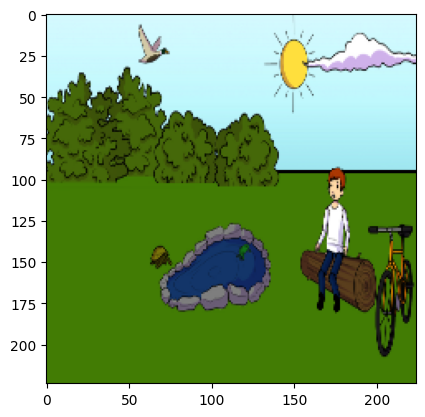

In [ ]:
predict_answer("/content/abstract_v002_train2015_000000000056.png","is there a girl in the picture??","No")

In [ ]:
from tensorflow.keras.optimizers import Adam
!rm -rf ./logs1/

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

checkpoint = ModelCheckpoint("basic_model1.keras", # Change here to .h5
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
earlystop= EarlyStopping(monitor = 'val_loss',
                            mode="min",
                            min_delta = 0,
                            patience = 5,
                            verbose = 1)

# Remove write_grads argument or set it to False
tensorboard = TensorBoard(log_dir='logs1', histogram_freq=1)
# Alternatively, you can remove it entirely:
# tensorboard = TensorBoard(log_dir='logs1', histogram_freq=1)

callbacks = [checkpoint,earlystop,tensorboard]

In [ ]:
# final_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# # Remove workers and use_multiprocessing arguments
# h1 = final_model.fit(train_dataset, epochs=5, verbose=1, callbacks=callbacks, validation_data=test_dataset)

In [ ]:
# from tensorflow.keras.models import load_model # Import the load_model function


# final_model=load_model('/content/drive/MyDrive/FinalProjectKS/basic_model1.h5')


In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Get predictions from the model
# y_pred_probs = final_model.predict(test_dataset)  # Get predicted probabilities
# y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels (0 or 1)

# # 2. Get true labels
# y_true = np.argmax(np.concatenate([y for _, y in test_dataset], axis=0), axis=1) # Convert one-hot to class labels

# # 3. Create confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# # 4. Visualize confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=ohe.categories_[0], yticklabels=ohe.categories_[0])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# fig=plt.figure(figsize=(20,10))
# fig.suptitle('Histogram of Batch norm layer',fontsize=30)
# plt.subplot(1,1,1)
# plt.imshow(img1)

In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Get predictions from the model
# y_pred_probs = final_model.predict(test_dataset)
# y_pred = np.argmax(y_pred_probs, axis=1)

# # 2. Get true labels
# y_true = np.argmax(np.concatenate([y for _, y in test_dataset], axis=0), axis=1)

# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# # 4. Print metrics
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")


In [ ]:
# Model 2


In [ ]:
# !pip install pytorch-pretrained-bert #installing pytorch_pretrained_bert package

# from pytorch_pretrained_bert import BertTokenizer # importing the BertTokenizer

In [ ]:
# !pip install transformers  # Install the 'transformers' package

# from transformers import BertTokenizer
# import tensorflow as tf
# from transformers import BertTokenizer, BertModel, BertConfig
# import tensorflow as tf
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
# from tensorflow.keras import initializers



# #BertTokenizer=bert.bert_tokenization.FullTokenizer


In [ ]:
# tokenizer=BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)


In [ ]:
# model_ckpt = "bert-base-uncased"  # Or your desired checkpoint path
# config = BertConfig.from_pretrained(model_ckpt)  # Load the configuration
# l_bert = BertModel.from_pretrained(model_ckpt, config=config)  # Load the model with the configuration


# l_bert.trainable=False

In [ ]:
# train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:24] + ['[SEP]'], x_train['ques'].tolist()))
# test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:24] + ['[SEP]'], x_test['ques'].tolist()))

In [ ]:
# train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=24, truncating="post", padding="pre", dtype="int")
# test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=24, truncating="post", padding="pre", dtype="int")

In [ ]:
# def map_func(img_name, question):
#     # Construct the full path to the feature file
#     features_dir = '/content/drive/MyDrive/FinalProjectKS/preprocessed_images'
#     image_id = os.path.basename(img_name.decode('utf-8')).split('_')[-1].split('.')[0]
#     img_path = os.path.join(features_dir, f"abstract_v002_train2015_{image_id}_features.npy")

#     img_tensor = np.load(img_path)
#     img_tensor = img_tensor.reshape(4096,)
#     question = question.astype(np.int64)
#     question = question.reshape(24,)  # Reshape to (24,)
#     return img_tensor, question

# train_tokens_ids = tf.convert_to_tensor(train_tokens_ids, dtype=tf.int32)
# test_tokens_ids = tf.convert_to_tensor(test_tokens_ids, dtype=tf.int32)

In [ ]:
# img_fl = x_train['im_path'].tolist()
# train_dataset = tf.data.Dataset.from_tensor_slices((img_fl, train_tokens_ids))

# # Apply map_func with tf.py_function
# train_dataset = train_dataset.map(
#     lambda item1, item2: tf.py_function(map_func, [item1, item2], [tf.float32, tf.int32]),
#     num_parallel_calls=tf.data.experimental.AUTOTUNE
# )

# op_train_dataset = tf.data.Dataset.from_tensor_slices(answ_train)
# train_dataset = tf.data.Dataset.zip((train_dataset, op_train_dataset))

# # Highlighted change: Reshape answers instead of using ensure_shape directly
# train_dataset = train_dataset.map(
#     lambda img_ques, answ: (
#         (tf.ensure_shape(img_ques[0], (4096,)), tf.ensure_shape(img_ques[1], (24,))),
#         tf.reshape(answ, (2,))
#     )
# )

# train_dataset = train_dataset.batch(1000, drop_remainder=True)

# # Highlighted change: Explicitly set shapes after batching
# train_dataset = train_dataset.map(
#     lambda x, y: (
#         (tf.ensure_shape(x[0], (1000, 4096)), tf.ensure_shape(x[1], (1000, 24))),
#         tf.ensure_shape(y, (1000, 2))
#     )
# )

# train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# img_fl_te = x_test['im_path'].tolist()
# test_dataset = tf.data.Dataset.from_tensor_slices((img_fl_te, test_tokens_ids))

# test_dataset = test_dataset.map(
#     lambda item1, item2: tf.py_function(map_func, [item1, item2], [tf.float32, tf.int32]),
#     num_parallel_calls=tf.data.experimental.AUTOTUNE
# )

# op_test_dataset = tf.data.Dataset.from_tensor_slices(answ_test)
# test_dataset = tf.data.Dataset.zip((test_dataset, op_test_dataset))

# # Highlighted change: Reshape answers instead of using ensure_shape directly
# test_dataset = test_dataset.map(
#     lambda img_ques, answ: (
#         (tf.ensure_shape(img_ques[0], (4096,)), tf.ensure_shape(img_ques[1], (24,))),
#         tf.reshape(answ, (2,))
#     )
# )

# test_dataset = test_dataset.batch(1000, drop_remainder=True)

# # Highlighted change: Explicitly set shapes after batching
# test_dataset = test_dataset.map(
#     lambda x, y: (
#         (tf.ensure_shape(x[0], (1000, 4096)), tf.ensure_shape(x[1], (1000, 24))),
#         tf.ensure_shape(y, (1000, 2))
#     )
# )

# test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# Model 2 training

In [ ]:
# !pip install transformers
# from transformers import BertTokenizer, BertModel,BertConfig # Importing TFBertModel from transformers

In [ ]:
# def bert_embed(x):
#   return l_bert(x).last_hidden_state


# ques_inp = tf.keras.layers.Input(shape=(24,), dtype=tf.int64) # Make sure input is int64
# # Specify output_shape for the Lambda layer
# embed = tf.keras.layers.Lambda(bert_embed, output_shape=(24, 768))(ques_inp) # Wrap with Lambda layer and specify output_shape

In [ ]:
# def bert_embed(x):
#     # Convert the TensorFlow tensor to a PyTorch tensor
#     x_pt = torch.tensor(x.numpy())
#     # Ensure the BERT model is on the correct device (CPU or GPU)
#     # Assuming l_bert is your loaded BERT model
#     l_bert.to(x_pt.device)
#     # Disable gradient calculation for BERT embeddings
#     with torch.no_grad():
#         # Get the last hidden state from BERT
#         embeddings = l_bert(x_pt).last_hidden_state
#     # Convert the embeddings back to a TensorFlow tensor
#     return tf.convert_to_tensor(embeddings.numpy(), dtype=tf.float32)

# # Input layer for question data
# ques_inp = tf.keras.layers.Input(shape=(24,), dtype=tf.int32)

# # Lambda layer to apply BERT embedding using tf.py_function
# embed = tf.keras.layers.Lambda(
#     lambda x: tf.py_function(bert_embed, [x], tf.float32),
#     output_shape=(24, 768)
# )(ques_inp)
# embed = tf.ensure_shape(embed, [None, 24, 768])


# # Flatten the BERT embeddings
# flat = tf.keras.layers.Flatten()(embed)

# # Input layer for image features
# image_inp = tf.keras.layers.Input(shape=(4096,))

# # Concatenate image features and BERT embeddings
# concat = tf.keras.layers.concatenate([image_inp, flat])

# # Output layer with 2 units and softmax activation
# out = tf.keras.layers.Dense(2, kernel_initializer=initializers.he_normal(seed=42), activation='softmax')(concat)

# # Create the Keras model
# model = tf.keras.Model(inputs=[image_inp, ques_inp], outputs=out)

In [ ]:
# train_dataset = train_dataset.map(
#     lambda x, y: (
#         (tf.ensure_shape(x[0], (1000, 4096)), tf.ensure_shape(x[1], (1000, 24))),
#         tf.ensure_shape(y, (1000, 2))
#     )
# )

In [ ]:
# model.build(input_shape=[(None, 4096), (None, 24)])


In [ ]:
# def bert_embed(x):
#     x_pt = torch.tensor(x.numpy())
#     with torch.no_grad():
#         embeddings = l_bert(x_pt).last_hidden_state
#     tf_tensor = tf.convert_to_tensor(embeddings.numpy())
#     print("BERT Embed Output Shape:", tf_tensor.shape)  # Debug output
#     return tf_tensor

In [ ]:
# model.summary()


In [ ]:
#model.build(input_shape=[(None,4096),(None,24)])


In [ ]:
# checkpoint = ModelCheckpoint(
#     "basic_model4.keras",
#     monitor="val_loss",
#     mode="min",
#     save_best_only=True,
#     verbose=1
# )
# tensorboard = TensorBoard(log_dir='logs1', histogram_freq=1)
# callbacks = [checkpoint, tensorboard]

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# h1 = model.fit(train_dataset, epochs=10, verbose=1, callbacks=callbacks, validation_data=test_dataset)

In [ ]:
# for batch in train_dataset.take(1):
#     print("Image input shape:", batch[0][0].shape)  # Should be (1000, 4096)
#     print("Question input shape:", batch[0][1].shape)  # Should be (1000, 24)
#     print("Output shape:", batch[1].shape)  # Should be (1000, 2)